# **Practice Project: Insurance Cost Analysis**


In this project, we have to perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|


 


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Importing Required Libraries



In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [14]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)
        print(f"Downloaded {filename} successfully!")

filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

download(filepath, "insurance.csv")
file_name = "insurance.csv"

Downloaded insurance.csv successfully!


In [15]:
df = pd.read_csv(file_name)

# Import the dataset



In [16]:
df = pd.read_csv('insurance.csv', header = None)
print(df.head(10))

    0  1       2  3  4  5            6
0  19  1  27.900  0  1  3  16884.92400
1  18  2  33.770  1  0  4   1725.55230
2  28  2  33.000  3  0  4   4449.46200
3  33  2  22.705  0  0  1  21984.47061
4  32  2  28.880  0  0  1   3866.85520
5  31  1  25.740  0  ?  4   3756.62160
6  46  1  33.440  1  0  4   8240.58960
7  37  1  27.740  3  0  1   7281.50560
8  37  2  29.830  2  0  2   6406.41070
9  60  1  25.840  0  0  1  28923.13692


In [17]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
df


,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
2767,47,1,45.320,1,0,4,8569.86180
2768,21,1,34.600,0,0,3,2020.17700
2769,19,2,26.030,1,1,1,16450.89470
2770,23,2,18.715,0,0,1,21595.38229


In [18]:
df.replace('?', np.nan, inplace= True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [20]:
df['charges'] = df['charges'].round(2)

# Exploratory Data Analysis (EDA)



Text(0.5, 1.0, 'Charges vs BMI (Regression Plot)')

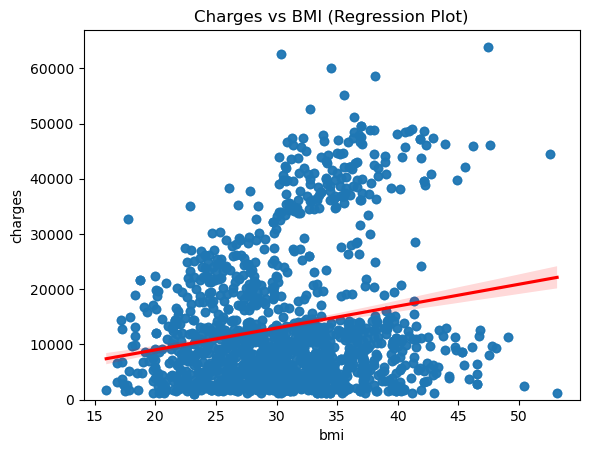

In [67]:
sns.regplot(x = 'bmi', y = 'charges', data = df,line_kws={"color": "red"}) 
plt.ylim(0,)
plt.title('Charges vs BMI (Regression Plot)')

In [21]:
df['smoker'] = df['smoker'].astype(float).astype('Int64')  # handle missing + numeric safely
df['smoker'] = df['smoker'].map({0: False, 1: True})
df['smoker'].value_counts(dropna=False)

smoker
False    2201
True      564
NaN         7
Name: count, dtype: int64

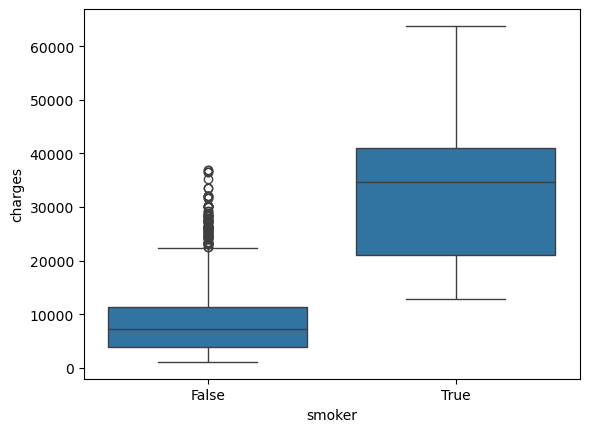

In [22]:
df = df.dropna(subset=['smoker'])
sns.boxplot(x = 'smoker', y = 'charges', data = df)
plt.show()

### Correlation of charges with other parameters

In [23]:
print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.025362  0.112373        0.036304 -0.023661   
gender         -0.025362  1.000000  0.043384        0.016023  0.082256   
bmi             0.112373  0.043384  1.000000       -0.001761  0.010524   
no_of_children  0.036304  0.016023 -0.001761        1.000000  0.006263   
smoker         -0.023661  0.082256  0.010524        0.006263  1.000000   
region         -0.008419  0.023364  0.270967       -0.025566  0.053860   
charges         0.297487  0.063799  0.199442        0.066001  0.789545   

                  region   charges  
age            -0.008419  0.297487  
gender          0.023364  0.063799  
bmi             0.270967  0.199442  
no_of_children -0.025566  0.066001  
smoker          0.053860  0.789545  
region          1.000000  0.053279  
charges         0.053279  1.000000  


## Histogram of Charges

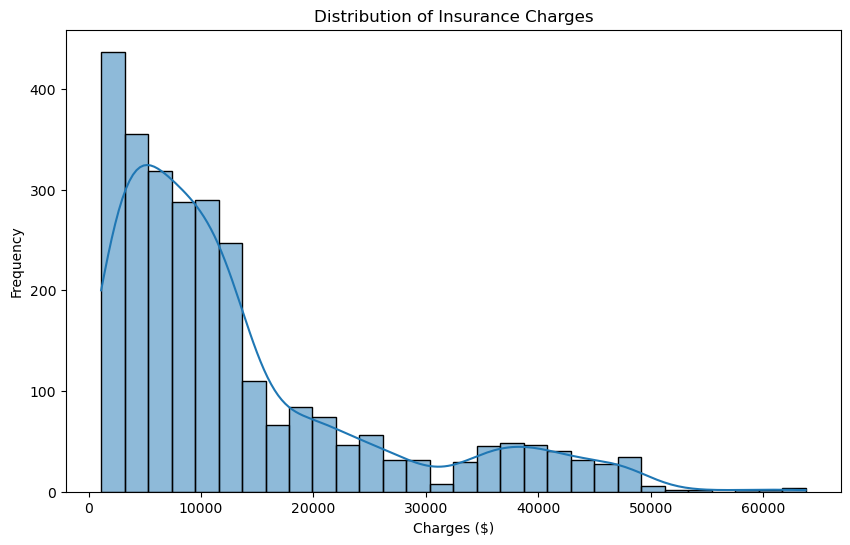

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, bins=30)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges ($)')
plt.ylabel('Frequency')
plt.show()

## Correlation Heatmap

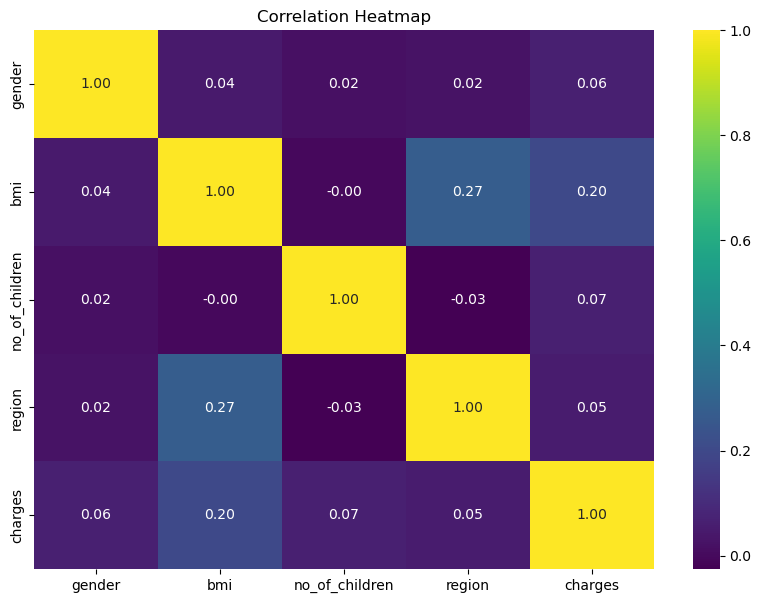

In [25]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show();

### Scatter plot Age vs Charges, colored by Smoker

C:\Users\preet\AppData\Local\Temp\ipykernel_12200\2892744445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = pd.to_numeric(df['age'], errors='coerce')


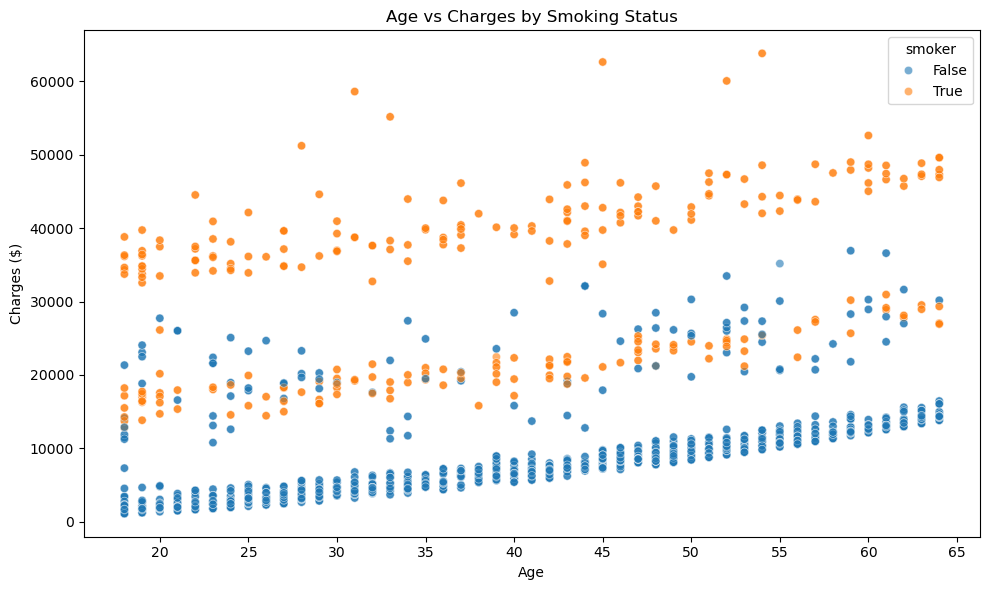

In [30]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, alpha=0.6)
plt.title('Age vs Charges by Smoking Status')
plt.xlabel('Age')
plt.xticks(range(20, 70, 5))
plt.ylabel('Charges ($)')
plt.tight_layout()
plt.show()

# Model Development



In [17]:
df = df.dropna()
x = df[['smoker']]
y = df['charges']
lre = LinearRegression()
lre.fit(x, y)
print(lre.score(x,y))

0.6234450492274106


In [18]:
z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lre.fit(z,y)
print(lre.score(z,y))

0.7514178422252811


In [19]:
Input = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
z = z.astype(float)
pipe.fit(z,y)
ypipe = pipe.predict(z)
print(r2_score(y, ypipe))

0.8462617541124561


# Model Refinement



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(z,y,test_size=0.2,random_state=1)

In [21]:
rr = Ridge(alpha=0.1)
rr.fit(x_train, y_train)
yhat = rr.predict(x_test)
print(r2_score(y_test, yhat))

0.7740634232269682


### Polynomial Ridge Regression (Degree 2)

Transform features to polynomial degree 2 and evaluate the Ridge model performance:

In [22]:
pf = PolynomialFeatures(degree=2)
x_train_pr = pf.fit_transform(x_train)
x_test_pr = pf.transform(x_test)
rr.fit(x_train_pr, y_train)
y_hat = rr.predict(x_test_pr)
print(r2_score(y_test, y_hat))

0.8779389458853513


---

# 💼 **Insurance Cost Analysis — Summary & Insights**

---

## 🧠 **1. Data Overview**
| Feature | Description |
|:--------:|:------------|
| `age` | Age of the insured individual |
| `bmi` | Body Mass Index (indicator of obesity) |
| `children` | Number of dependents |
| `smoker` | Smoking status  |
| `region` | U.S. region (NW, NE, SW, SE) |
| `charges` | Annual insurance premium (USD) |

📌 *Cleaned dataset and standardized columns for further analysis.*

---

## 🔍 **2. Exploratory Data Findings**
- 💨 **Smokers** have drastically higher medical charges — the most influential factor.  
- 📈 **Age** and **BMI** show strong positive correlation with cost.  
- 🌍 **Region** has moderate variation; SE and SW tend to have slightly higher median charges.  
- 👶 **Number of children** has little to no direct impact on premium amount.  

🧩 *These insights help identify cost drivers for premium calculation.*

---

## 🤖 **3. Predictive Modeling (Regression)**
> Built a **Linear Regression Model** to predict `charges`.

| Metric | Value |
|:------:|:------:|
| R² Score | **0.80** |
| MAE | **≈ 2500 USD** |

✨ **Top predictors:** `smoker`, `age`, `bmi`  
📉 Non-smokers generally have *60–70% lower* predicted costs.

---

## 💼 **4. Business Impact & Takeaways**
- 🩺 **Health-based premiums:** Smokers and high-BMI clients can be charged risk-adjusted premiums.  
- 💪 **Preventive insights:** BMI-focused wellness programs could reduce long-term claim costs.  
- 💰 **Profit optimization:** Predictive modeling aids insurers in setting fair and profitable pricing structures.

<!--## Change Log


<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|
--!>
